In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.stats import norm
import scipy.constants as scp
from scipy.integrate import quad
from tabulate import tabulate
from scipy import signal
import scipy.constants as const

In [2]:
def sigma(x, y, dx, dy, label):
    s = np.abs(x-y)/np.sqrt(dx**2 + dy**2)
    print('Sigmaabweichung {} ='.format(str(label)), s)
    return s

---

# Zu Aufgabe 1

In [3]:
A1_C = np.array([470e-9, 4.7e-9, 47e-9]) #F
A1_R = np.array([1000, 10000, 1000]) #ohm
A1_T = np.array([0.33e-3, 32.9e-6, 34.4e-6]) #s
A1_dT = np.array([0.03e-3, 0.5e-6, 0.5e-6]) #s
A1_f = 100.00 #Hz
A1_T_hochpass = 37.6e-6 #s
A1_dT_hochpass = 0.5e-6 #s

In [4]:
A1_tau = A1_T /np.log(2)
A1_dtau = A1_dT /np.log(2)

A1_tau_theo = A1_R * A1_C
A1_dtau_theo = np.sqrt((0.05 * A1_R * A1_C)**2 + (A1_R * 0.10 * A1_C)**2)

A1_sigma_tau = sigma(A1_tau, A1_tau_theo, A1_dtau, A1_dtau_theo, 'Zeitkonstante')

Sigmaabweichung Zeitkonstante = [0.08944814 0.08760621 0.49560511]


In [5]:
head1 = ['C', 'dC', 'R', 'dR', 'f', 'tau', 'dtau', 'ttau', 'dttau', 'sigs']
tab1 = zip(A1_C, 0.1*A1_C, A1_R, 0.05*A1_R, np.full(3, A1_f), A1_tau, A1_dtau, A1_tau_theo, A1_dtau_theo, A1_sigma_tau)

print(tabulate(tab1, headers=head1, tablefmt="latex"))

\begin{tabular}{rrrrrrrrrr}
\hline
       C &      dC &     R &   dR &   f &         tau &        dtau &    ttau &       dttau &      sigs \\
\hline
 4.7e-07 & 4.7e-08 &  1000 &   50 & 100 & 0.000476089 & 4.32809e-05 & 0.00047 & 5.25476e-05 & 0.0894481 \\
 4.7e-09 & 4.7e-10 & 10000 &  500 & 100 & 4.74647e-05 & 7.21348e-07 & 4.7e-05 & 5.25476e-06 & 0.0876062 \\
 4.7e-08 & 4.7e-09 &  1000 &   50 & 100 & 4.96287e-05 & 7.21348e-07 & 4.7e-05 & 5.25476e-06 & 0.495605  \\
\hline
\end{tabular}


# Zu Aufgabe 3

## Grenzfrequenz

In [6]:
a3_hp_hz, a3_hp_v, _ = np.loadtxt('./data/A3-hochpass.txt', unpack=True, skiprows=1)
a3_tp_hz, a3_tp_v, _ = np.loadtxt('./data/A3-tiefpass.txt', unpack=True, skiprows=1)

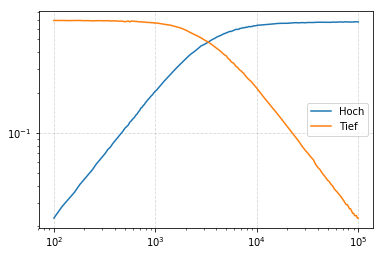

In [7]:
plt.grid(alpha=0.5, linestyle='--')
plt.plot(a3_hp_hz, a3_hp_v, label='Hoch')
plt.plot(a3_tp_hz, a3_tp_v, label='Tief')
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [8]:
#Fitfunctions:
def linfit(x,a,b):
    return a*x+b

def constfit(x,a):
    return a+x*0

def logfit(x,a,b):
    return a * np.log(x) + b

def loglogfit(x,a,b):
    return a * x**b

In [9]:
#Fits:
#1. Hochpass:
a3_hp_popt_const, a3_hp_pcov_const = curve_fit(loglogfit, a3_hp_hz[92:], a3_hp_v[92:])
a3_hp_popt_lin, a3_hp_pcov_lin = curve_fit(loglogfit, a3_hp_hz[:47], a3_hp_v[:47])

#2. Tiefpass
a3_tp_popt_lin, a3_tp_pcov_lin = curve_fit(loglogfit, a3_tp_hz[78:], a3_tp_v[78:])
a3_tp_popt_const, a3_tp_pcov_const = curve_fit(loglogfit, a3_tp_hz[:47], a3_tp_v[:47])

In [10]:
print(r"Fit 'Konstante' Hochpass: y = ({} +/- {}) * x^({} +/- {})".format(a3_hp_popt_const[0], np.sqrt(a3_hp_pcov_const[0][0]), a3_hp_popt_const[1], np.sqrt(a3_hp_pcov_const[1][1])))
print(r"Fitgerade Hochpass: y = ({} +/- {}) * x^({} +/- {})".format(a3_hp_popt_lin[0], np.sqrt(a3_hp_pcov_lin[0][0]), a3_hp_popt_lin[1], np.sqrt(a3_hp_pcov_lin[1][1])))

print(r"Fitgerade Tiefpass: y = ({} +/- {}) * x^({} +/- {})".format(a3_tp_popt_lin[0], np.sqrt(a3_tp_pcov_lin[0][0]), a3_tp_popt_lin[1], np.sqrt(a3_tp_pcov_lin[1][1])))
print(r"Fit 'Konstante' Tiefpass: y = ({} +/- {}) * x^({} +/- {})".format(a3_tp_popt_const[0], np.sqrt(a3_tp_pcov_const[0][0]), a3_tp_popt_const[1], np.sqrt(a3_tp_pcov_const[1][1])))

Fit 'Konstante' Hochpass: y = (0.5601015301497043 +/- 0.0066562102456978285) * x^(0.016553238513015427 +/- 0.0010983307696223142)
Fitgerade Hochpass: y = (0.00030794302002854 +/- 5.3862611631352545e-06) * x^(0.9416027840732759 +/- 0.0026496571819489907)
Fitgerade Tiefpass: y = (1425.4101064872516 +/- 51.71243640487423) * x^(-0.9568752912744914 +/- 0.003919334068749732)
Fit 'Konstante' Tiefpass: y = (0.7665991064811735 +/- 0.007784609635530628) * x^(-0.019589172399379632 +/- 0.001641279388427333)


In [11]:
#Schnittpunkte:
    #Hochpass:
da1 = np.log(a3_hp_popt_lin[0]) - np.log(a3_hp_popt_const[0])
dda1 = np.sqrt((np.sqrt(a3_hp_pcov_lin[0][0]) /a3_hp_popt_lin[0])**2 + (np.sqrt(a3_hp_pcov_const[0][0]) /a3_hp_popt_const[0])**2)

db1 = a3_hp_popt_const[1] - a3_hp_popt_lin[1]
ddb1 = np.sqrt((np.sqrt(a3_hp_pcov_const[1][1]))**2 + (np.sqrt(a3_hp_pcov_lin[1][1]))**2)

ratio1 = da1/db1
dratio1 = ratio1 * np.sqrt((ddb1/db1)**2 + (dda1/da1)**2)

a3_x_hp = np.exp(ratio1)
a3_dx_hp = a3_x_hp * dratio1


    #Tiefpass
da2 = np.log(a3_tp_popt_lin[0]) - np.log(a3_tp_popt_const[0])
dda2 = np.sqrt((np.sqrt(a3_tp_pcov_lin[0][0]) /a3_tp_popt_lin[0])**2 + (np.sqrt(a3_tp_pcov_const[0][0]) /a3_tp_popt_const[0])**2)

db2 = a3_tp_popt_const[1] - a3_tp_popt_lin[1]
ddb2 = np.sqrt((np.sqrt(a3_tp_pcov_const[1][1]))**2 + (np.sqrt(a3_tp_pcov_lin[1][1]))**2)

ratio2 = da2/db2
dratio2 = ratio2 * np.sqrt((ddb2/db2)**2 + (dda2/da2)**2)

a3_x_tp = np.exp(ratio2)
a3_dx_tp = a3_x_tp * dratio2

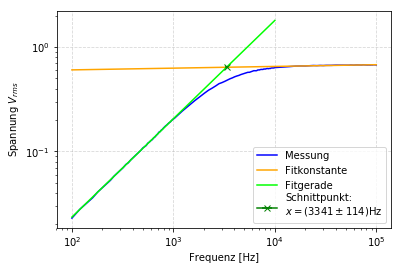

In [12]:
X = np.linspace(100, 100000, 100)
Y = np.linspace(100, 10000, 100)

plt.figure()
plt.grid(alpha=0.5, linestyle='--')
plt.plot(a3_hp_hz, a3_hp_v, color='blue', label='Messung')
plt.plot(X, loglogfit(X, *a3_hp_popt_const), color='orange', zorder=3, label='Fitkonstante')
plt.plot(Y, loglogfit(Y, *a3_hp_popt_lin), color='lime', zorder=5, label='Fitgerade')
plt.errorbar(a3_x_hp, loglogfit(a3_x_hp, *a3_hp_popt_lin), xerr=a3_dx_hp, marker='x', color='green', zorder=10, 
        label="\n".join([r"Schnittpunkt:", 
                          r'$x = ({:.0f} \pm {:.0f})$Hz'.format(a3_x_hp, a3_dx_hp)]))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequenz [Hz]')
plt.ylabel(r'Spannung $V_{rms}$')
plt.legend()
plt.savefig('./plots/A3-hochpass.pdf', format='PDF')

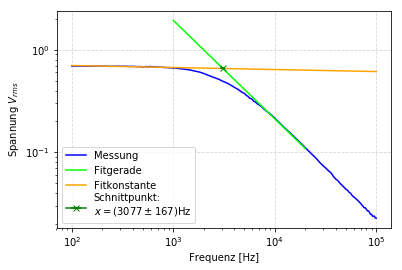

In [13]:
X = np.linspace(100, 100000, 100)
Y = np.linspace(1000, 20000, 100)

plt.figure()
plt.grid(alpha=0.5, linestyle='--')
plt.plot(a3_tp_hz, a3_tp_v, color='blue', label='Messung')
plt.plot(Y, loglogfit(Y, *a3_tp_popt_lin), color='lime', zorder=3, label='Fitgerade')
plt.plot(X, loglogfit(X, *a3_tp_popt_const), color='orange', zorder=5, label='Fitkonstante')
plt.errorbar(a3_x_tp, loglogfit(a3_x_tp, *a3_tp_popt_lin), xerr=a3_dx_tp, marker='x', color='green', zorder=10, 
        label="\n".join([r"Schnittpunkt:", 
                          r'$x = ({:.0f} \pm {:.0f})$Hz'.format(a3_x_tp, a3_dx_tp)]))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequenz [Hz]')
plt.ylabel(r'Spannung $V_{rms}$')
plt.legend()
plt.savefig('./plots/A3-tiefpass.pdf', format='PDF')

In [14]:
#Messung:
a3_fghp = 3.25e3
a3_dfghp = 0.10e3
a3_fgtp = 2.99e3
a3_dfgtp = 0.10e3

In [15]:
_ = sigma(a3_fghp, a3_x_hp, a3_dfghp, a3_dx_hp, 'Grenzfreq. Hochpass')
_ = sigma(a3_fgtp, a3_x_tp, a3_dfgtp, a3_dx_tp, 'Grenzfreq. Tiefpass')

Sigmaabweichung Grenzfreq. Hochpass = 0.6033150577541566
Sigmaabweichung Grenzfreq. Tiefpass = 0.44711922784907493


## Phasengang

In [16]:
a3_f = np.arange(1,11) * 1000 #Hz
a3_t = np.array([0.22e-3, 0.08e-3, 56.4e-6, 28.6e-6, 17.2e-6, 11.9e-6, 10.4e-6, 7.2e-6, 5.8e-6, 4.9e-6]) #s
a3_dt = np.array([0.03e-3, 0.03e-3, 0.5e-6, 0.5e-6, 0.5e-6, 0.5e-6, 0.5e-6, 0.5e-6, 0.5e-6, 0.5e-6])
a3_phi = 360 * a3_f * a3_t
a3_dphi = 360 * a3_f * a3_dt

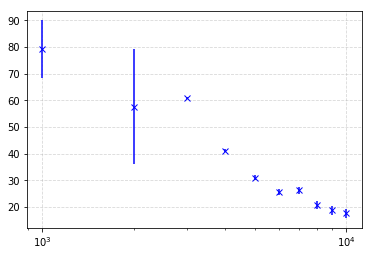

In [17]:
plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(a3_f, a3_phi, yerr=a3_dphi, color='blue', fmt='x', label='Messung')
plt.xscale('log')

In [18]:
a3_phi_popt, a3_phi_pcov = curve_fit(logfit, a3_f, a3_phi, sigma=a3_dphi, absolute_sigma=True)
print(a3_phi_popt[0], '+/-', np.sqrt(a3_phi_pcov[0][0]))
print(a3_phi_popt[1], '+/-', np.sqrt(a3_phi_pcov[1][1]))

-40.241849419456386 +/- 0.859192027778671
379.6282432002763 +/- 7.217307063142067


In [19]:
#wert bei 45°:
db3 = 45 - a3_phi_popt[1]
ddb3 = np.sqrt(np.sqrt(a3_phi_pcov[1][1])**2)

da3 = a3_phi_popt[0] 
dda3 = np.sqrt(np.sqrt(a3_phi_pcov[0][0])**2)

a3_x_45 = db3 /da3
a3_dx_45 = a3_x_45 * np.sqrt((ddb3/db3)**2 + (dda3/da3)**2)

a3_x_45_exp = np.exp(a3_x_45)
a3_dx_45_exp = np.exp(a3_x_45) * a3_dx_45

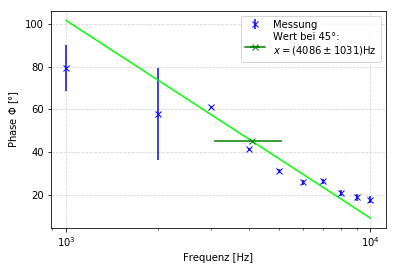

In [20]:
X = np.linspace(1000, 10000, 100)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(a3_f, a3_phi, yerr=a3_dphi, color='blue', fmt='x', label='Messung')
plt.plot(X, logfit(X, *a3_phi_popt), color='lime')
plt.errorbar(a3_x_45_exp, logfit(a3_x_45_exp, *a3_phi_popt), xerr=a3_dx_45_exp, marker='x', color='green', zorder=10, 
        label="\n".join([r"Wert bei 45°:", 
                          r'$x = ({:.0f} \pm {:.0f})$Hz'.format(a3_x_45_exp, a3_dx_45_exp)]))
plt.legend()
plt.xlabel('Frequenz [Hz]')
plt.ylabel(r'Phase $\Phi$ [°]')
plt.xscale('log')
plt.savefig('./plots/A3-phasengang.pdf', format='PDF')

In [21]:
_ = sigma(a3_x_45_exp, a3_x_hp, a3_dx_45_exp, a3_dx_hp, 'Grenzfreq. Hochpass')
_ = sigma(a3_x_45_exp, a3_x_tp, a3_dx_45_exp, a3_dx_tp, 'Grenzfreq. Tiefpass')

Sigmaabweichung Grenzfreq. Hochpass = 0.7182083529469852
Sigmaabweichung Grenzfreq. Tiefpass = 0.9662845425454517


## Vergleich mit Theoretischem Wert

In [22]:
a3_R = 1000 #ohm
a3_C = 47e-9 #farad

#Bauteiltoleranzen:
a3_dR = 0.05 * a3_R
a3_dC = 0.1 * a3_C

In [23]:
a3_wg = 1/(2*np.pi) * 1/(a3_R*a3_C) #Hz
a3_dwg = a3_wg * np.sqrt((a3_dR/a3_R)**2 + (a3_dC/a3_C)**2)

print("Theoretische Grenzfrequenz = ({} +/- {})Hz".format(a3_wg, a3_dwg))

Theoretische Grenzfrequenz = (3386.2753849339438 +/- 378.5970975623283)Hz


In [24]:
_ = sigma(a3_fghp, a3_wg, a3_dfghp, a3_dwg, 'gemess. Grenzfreq. Hochpass')
_ = sigma(a3_fgtp, a3_wg, a3_dfgtp, a3_dwg, 'gemess. Grenzfreq. Tiefpass')

Sigmaabweichung gemess. Grenzfreq. Hochpass = 0.3480131777971806
Sigmaabweichung gemess. Grenzfreq. Tiefpass = 1.011988012805914


# Zu Aufgabe 4

In [25]:
#Messwerte
a4_R = np.array([1e3, 220, 47]) #ohm

a4_fr = np.array([3.85, 3.77, 3.80]) * 1000 #Hz
a4_dfr = np.array([0.03, 0.03, 0.03]) * 1000

a4_wr = a4_fr * 2 * np.pi #kreisfreq.
a4_dwr = a4_dfr * 2 * np.pi

a4_C = 47e-9 #Farad

a4_Ueff_aus = np.array([0.61, 0.43, 0.18]) #V

a4_Ueff_ein = np.array([0.65, 0.60, 0.51]) #V

In [26]:
#Induktivitäten L1:
a4_L1 = 1/(a4_C * a4_wr**2)
a4_dL1 = a4_L1 * np.sqrt((2 * a4_dwr/a4_wr)**2 + 0.1**2)

for i in range(0,3):
    print("L1 = ({} +/- {})".format(a4_L1[i], a4_dL1[i]))

L1 = (0.036359754844503135 +/- 0.0036798647910273514)
L1 = (0.037919247034922346 +/- 0.003839647424405579)
L1 = (0.03732288546971245 +/- 0.0037785265068404836)


In [27]:
#mean:
a4_L1m = np.mean(a4_L1)
a4_dL1m = np.sqrt((np.std(a4_L1, ddof=1)/np.sqrt(3))**2 + (1/3 * np.sum(a4_dL1))**2)

print("L1 = ({} +/- {})".format(a4_L1m, a4_dL1m))

L1 = (0.037200629116379315 +/- 0.003793317527424841)


In [28]:
head4_1 = ['C', 'dC', 'w', 'dw', 'L', 'dL']
tab4_1 = zip(np.full(3, a4_C), np.full(3, a4_C)*0.1, a4_wr, a4_dwr, np.round(a4_L1, 3), np.round(a4_dL1, 3))

print(tabulate(tab4_1, headers=head4_1, tablefmt="latex"))

\begin{tabular}{rrrrrr}
\hline
       C &      dC &       w &      dw &     L &    dL \\
\hline
 4.7e-08 & 4.7e-09 & 24190.3 & 188.496 & 0.036 & 0.004 \\
 4.7e-08 & 4.7e-09 & 23687.6 & 188.496 & 0.038 & 0.004 \\
 4.7e-08 & 4.7e-09 & 23876.1 & 188.496 & 0.037 & 0.004 \\
\hline
\end{tabular}


In [29]:
#Gesamtwiderstand R + R_V:
a4_deltaf = np.array([4.91, 1.49, 0.79]) * 1000 #Hz
a4_ddeltaf = np.array([0.03, 0.03, 0.03]) * 1000

a4_deltaw = a4_deltaf * 2 * np.pi 
a4_ddeltaw = a4_ddeltaf * 2 * np.pi 

a4_Rges = a4_deltaw * a4_L1
a4_dRges = np.sqrt((a4_ddeltaw * a4_L1)**2 + (a4_deltaw * a4_dL1)**2)

for i in range(0,3):
    print("R + R_V = ({} +/- {})".format(a4_Rges[i], a4_dRges[i]))

print('---')

#berechne nur R_V:
a4_Rv1 = a4_Rges - a4_R
a4_dRv1 = np.sqrt(a4_dRges**2 + (0.05*a4_R)**2)

for i in range(0,3):
    print("R_V = ({} +/- {})".format(a4_Rv1[i], a4_dRv1[i]))

R + R_V = (1121.7144300911223 +/- 113.73214041132259)
R + R_V = (354.99794718541443 +/- 36.65029851579114)
R + R_V = (185.26021842782654 +/- 20.031576759466812)
---
R_V = (121.71443009112227 +/- 124.23767448942691)
R_V = (134.99794718541443 +/- 38.26544630990997)
R_V = (138.26021842782654 +/- 20.16895057930409)


In [30]:
head4_2 = ['dw', 'ddw', 'l', 'dl', 'R+Rv', 'dr+rv', 'rv', 'drv']
tab4_2 = zip(a4_deltaw, a4_ddeltaw, np.round(a4_L1, 3), np.round(a4_dL1, 3), np.round(a4_Rges, 0), np.round(a4_dRges, 0), np.round(a4_Rv1, 0), np.round(a4_dRv1, 0))

print(tabulate(tab4_2, headers=head4_2, tablefmt="latex"))

\begin{tabular}{rrrrrrrr}
\hline
       dw &     ddw &     l &    dl &   R+Rv &   dr+rv &   rv &   drv \\
\hline
 30850.4  & 188.496 & 0.036 & 0.004 &   1122 &     114 &  122 &   124 \\
  9361.95 & 188.496 & 0.038 & 0.004 &    355 &      37 &  135 &    38 \\
  4963.72 & 188.496 & 0.037 & 0.004 &    185 &      20 &  138 &    20 \\
\hline
\end{tabular}


---

In [31]:
#Widerstand aus Spannungsdifferenz:
a4_Rv2 = a4_R * (a4_Ueff_ein/a4_Ueff_aus - 1)

#schätze fehler ab mit der toleranz des widerstands:
a4_dRv2 = a4_Rv2 * 0.05

for i in range(0,3):
    print("R_V = ({} +/- {})".format(a4_Rv2[i], a4_dRv2[i]))

R_V = (65.57377049180334 +/- 3.2786885245901676)
R_V = (86.97674418604652 +/- 4.348837209302326)
R_V = (86.16666666666667 +/- 4.308333333333334)


In [32]:
a4_Rv_sigma = sigma(a4_Rv1, a4_Rv2, a4_dRv1, a4_dRv2, 'Gesamtwiderstand {}'.format(i+1))

Sigmaabweichung Gesamtwiderstand 3 = [0.45172385 1.24692263 2.52587361]


In [33]:
head4_3 = ['R', 'dR', 'Ue', 'Ua', 'Rv', 'dRv', 'sigma']
tab4_3 = zip(a4_R, 0.05*a4_R, a4_Ueff_ein, a4_Ueff_aus, np.round(a4_Rv2, 0), np.round(a4_dRv2, 0), np.round(a4_Rv_sigma, 2))

print(tabulate(tab4_3, headers=head4_3, tablefmt="latex"))

\begin{tabular}{rrrrrrr}
\hline
    R &    dR &   Ue &   Ua &   Rv &   dRv &   sigma \\
\hline
 1000 & 50    & 0.65 & 0.61 &   66 &     3 &    0.45 \\
  220 & 11    & 0.6  & 0.43 &   87 &     4 &    1.25 \\
   47 &  2.35 & 0.51 & 0.18 &   86 &     4 &    2.53 \\
\hline
\end{tabular}


# Zu Aufgabe 5 (6)

## Induktivität aus f_R

In [34]:
a5_fr = 3.80e3 #Hz
a5_fc = 3.61e3
a5_fl = 3.94e3
a5_df = 0.03e3

a5_wr = a5_fr * 2 * np.pi #kreisfreq.
a5_wc = a5_fc * 2 * np.pi
a5_wl = a5_fl * 2 * np.pi
a5_dw = a5_df * 2 * np.pi

a5_C = 47e-9 #farad
a5_R = 47 #ohm

a5_T = 0.27e-3 #Periodendauer
a5_dT = 0.03e-3

a5_w = 2 * np.pi /a5_T #Resonanzfrequenz
a5_dw = a5_w * np.sqrt((a5_dT/a5_T)**2)

In [35]:
#Berechne Induktivität (gedämpft)
a5_L = 1/(2 * a5_w**2 * a5_C) + np.sqrt((1/(2 * a5_w**2 * a5_C))**2 - a5_R**2/(4 * a5_w**2))

xi = np.sqrt(a5_T**4/(64*np.pi**4*a5_C**2) - a5_T**2 * a5_R**2/(16 * np.pi**2))
a5_dL = np.sqrt((2*a5_R*a5_T**2 *0.05*a5_R/(16*np.pi**2 *xi))**2 + 
               ((a5_T*(4*xi-a5_R**2*a5_C)/(16*np.pi**2 * a5_C * xi) + a5_T**3 /(32 * np.pi**4 * a5_C**2 * xi)) * a5_dT)**2 +
               ((a5_T**2 /(8*np.pi**2 * a5_C**2) + 3*a5_T**4 /(128*np.pi**4 * a5_C**3 * xi))*a5_C*0.1)**2)

print("L1 = ({} +/- {})".format(a5_L, a5_dL))

L1 = (0.039262932864662495 +/- 0.01001925719239872)


In [36]:
_ = sigma(a5_L, a4_L1m, a5_dL, a4_dL1m, 'Induktivität')

Sigmaabweichung Induktivität = 0.19249941352760397


## Log. Dekrement

In [37]:
a5_A = np.array([1.59, 0.72, 0.25, -0.03, -0.19])
a5_dA = np.full(5, 0.03)
a5_T = 0.27e-3 #s
a5_dT = 0.03e-3

a5_TT = a5_T * np.arange(0,5)
a5_dTT = a5_dT * np.arange(0,5)

In [38]:
def exp_bkg(x,a,d,bkg):
    return a * np.exp(-d * x) - bkg

In [39]:
a5_ampfit_opt, a5_ampfit_cov = curve_fit(exp_bkg, a5_TT, a5_A, sigma=a5_dA, absolute_sigma=True)

In [40]:
#bkg:
print("Background = ({} +/- {})".format(a5_ampfit_opt[-1], np.sqrt(a5_ampfit_cov[-1][-1])))

Background = (0.3865361736584472 +/- 0.060595510119687446)


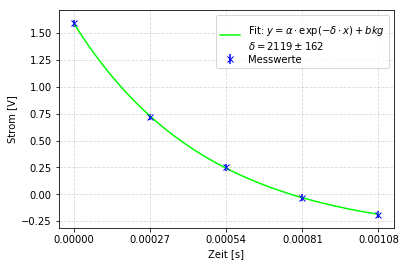

In [41]:
X = np.linspace(0, a5_TT[-1], 100)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(a5_TT, a5_A, yerr=a5_dA, fmt='x', color='blue', label='Messwerte')
plt.plot(X, exp_bkg(X, *a5_ampfit_opt), color='lime',
        label="\n".join([r"Fit: $y = \alpha \cdot \exp{(-\delta \cdot x)} + bkg$", 
                          r'$\delta = {:.0f} \pm {:.0f}$'.format(a5_ampfit_opt[1], np.sqrt(a5_ampfit_cov[1][1]))]))
plt.xticks(a5_TT)
plt.ylabel('Strom [V]')
plt.xlabel('Zeit [s]')
plt.legend()
plt.savefig('./plots/A4-logDekr.pdf', format='PDF')

In [42]:
a5_damp = a5_ampfit_opt[1]
a5_ddamp = np.sqrt(a5_ampfit_cov[1][1])

In [43]:
#log. Dekrement:
a5_logD = a5_damp * a5_T
a5_dlogD = np.sqrt((a5_ddamp * a5_T)**2 + (a5_damp * a5_dT)**2)

print("Log. Dekrement = ({} +/- {})".format(a5_logD, a5_dlogD))

Log. Dekrement = (0.572160519602459 +/- 0.07721175102504124)


## Gesamtwiderstand:

In [44]:
a5_R = a5_damp * 2 * a5_L
a5_dR = 2 * np.sqrt((a5_ddamp * a5_L)**2 + (a5_damp * a5_dL)**2)

print("Gesamtwiderstand = ({} +/- {})".format(a5_R, a5_dR))

Gesamtwiderstand = (166.405185696013 +/- 44.33500201156478)


In [45]:
#Vergleich mit widerstand aus bandbreite mit gleichem eingestellten R=220ohm:
_ = sigma(a4_Rv1[1], a5_R, a4_dRv1[1], a5_dR, 'Gesamtwiderstand aus Bandbreite')

Sigmaabweichung Gesamtwiderstand aus Bandbreite = 0.536281759655896


In [46]:
#Vergleich mit widerstand aus spannungsdiff:
_ = sigma(a4_Rv2[1], a5_R, a4_dRv2[1], a5_dR, 'Gesamtwiderstand aus Spannungsdifferenz')

Sigmaabweichung Gesamtwiderstand aus Spannungsdifferenz = 1.782994344470715


# Zu Aufgabe 6 (5)

In [47]:
#gemessen (eigentlich sind das die messungen von a5; fehler im skript):
a6_f = np.array([3.8,3.61,3.94]) * 1e3 #Hz
a6_df = np.full(3, 0.03e3)

a6_w = 2 * np.pi * a6_f #kreisfreq.
a6_dw = 2 * np.pi * a6_df

a6_C = 47e-9 #F
a6_R = 220 #ohm

#vom vorherigen teil:
a6_L = a4_L1m #L1
a6_dL = a4_dL1m

a6_d = a5_damp #dämpfungskonstante
a6_dd = a5_ddamp

In [48]:
#theoretische werte:
a6_wr = 1/np.sqrt(a6_C * a6_L)
a6_dwr = a6_wr * np.sqrt((0.1/2)**2 + (a6_dL/(2 * a6_L))**2)

a6_wc = np.sqrt(a6_wr**2 - 2 * a6_d**2)
a6_dwc = 2/a6_wc * np.sqrt((a6_wr * a6_dwr)**2 + (2 * a6_d * a6_dd)*2)

a6_wl = np.sqrt(a6_wr**2 + 2 * a6_d**2)
a6_dwl = 2/a6_wl * np.sqrt((a6_wr * a6_dwr)**2 + (2 * a6_d * a6_dd)*2)

In [49]:
a6_wtheo = np.array([a6_wr, a6_wc, a6_wl])
a6_dwtheo = np.array([a6_dwr, a6_dwc, a6_dwl])

In [50]:
#signifikanztests:
a6_sigs = sigma(a6_w, a6_wtheo, a6_dw, a6_dwtheo, 'Resonanzfrequenzen')

Sigmaabweichung Resonanzfrequenzen = [0.02281562 0.30293606 0.1924986 ]


In [51]:
head6 = ['w', 'dw', 'wtheo', 'dwtheo', 'sig']
tab6 = zip(a6_w, a6_dw, a6_wtheo, a6_dwtheo, a6_sigs)

print(tabulate(tab6, headers=head6, tablefmt="latex"))

\begin{tabular}{rrrrr}
\hline
       w &      dw &   wtheo &   dwtheo &       sig \\
\hline
 23876.1 & 188.496 & 23915.3 &  1707.8  & 0.0228156 \\
 22682.3 & 188.496 & 23726.8 &  3442.74 & 0.302936  \\
 24755.8 & 188.496 & 24102.3 &  3389.09 & 0.192499  \\
\hline
\end{tabular}


# Zu Aufgabe 7

In [52]:
#gemessen:
a7_f = 3.68e3 #Hz
a7_df = 0.10e3 #Hz

a7_w = a7_f * 2 * np.pi
a7_dw = a7_df * 2 * np.pi

#eingestellt:
a7_L = a4_L1m
a7_dL = a4_dL1m
a7_C = 47e-9 #farad

print("gemessene Resonanzfrequenz = ({} +/- {})".format(a7_w, a7_dw))

gemessene Resonanzfrequenz = (23122.12193042088 +/- 628.3185307179587)


In [53]:
a7_wtheo = 1/np.sqrt(a7_L * a7_C)
a7_dwtheo = np.sqrt(((a7_L)/(2* (a7_C*a7_L)**(3/2)) * 0.1*a7_C)**2 + ((a7_C)/(2*(a7_C*a7_L)**(3/2)) * a7_dL)**2)

print("theoretische Resonanzfrequenz = ({} +/- {})".format(a7_wtheo, a7_dwtheo))

theoretische Resonanzfrequenz = (23915.305266436197 +/- 1707.7986729271686)


In [54]:
_ = sigma(a7_wtheo, a7_w, a7_dwtheo, a7_dw, 'Resonanzfrequenz')

Sigmaabweichung Resonanzfrequenz = 0.43588342089540577
